## <font color = Green > Business Understanding </font>

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

## <font color = Green > Problem Statement </font>

After the recent funding programs, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in direct need of aid. 

And this is where you come in as a data analyst. Your job is to categorize the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most. The datasets contain those socio-economic factors that will help predict those countries. Some of the variables with their basic understanding are provided as follows: 

1. **GDP:** Per capita gross domestic product (GDP) measures a country's economic output per person and is calculated by dividing the GDP of a country by its population. Per capita GDP is a global measure for gauging the prosperity of nations and is used by economists, along with GDP, to analyze the prosperity of a country based on its economic growth. Small, rich countries and more developed industrial countries tend to have the highest per capita GDP
2. **Child Mortality Rate:** The infant mortality rate is the number of deaths of children under one year of age per 1,000 live births.
3. **Income Level:** Per capita income is a measure of the amount of money earned per person in a nation. Per capita income for a nation is calculated by dividing the country's national income by its population.
4. **Inflation:** Inflation is the rate of increase in prices over a given period of time. Inflation is typically a broad measure, such as the overall increase in prices or the increase in the cost of living in a country.
5. **Life Expectancy:** The term “life expectancy” refers to the number of years a person can expect to live. ... By definition, life expectancy is based on an estimate of the average age that members of a particular population group will be when they die.
6. **Total Fertility Rate:** The TFR is usually simply described as the average number of children per woman. TFR is the sum of the age-specific birth rates (5-year age groups between 10 and 49) for female residents of a specified geographic area (nation, state, county, etc.) during a specified time period (usually a calendar year) multiplied by 5.

## <font color = Green > Business Goal </font>

+ Your main task is to cluster the countries by the factors mentioned above, Analyse the clusters and identify the ones which are in direct need of aid and then present your solution and recommendations to the CEO. 
+ You can analyse the clusters by comparing how the variables vary for each cluster of countries to recognise and differentiate the clusters of developed countries from the clusters of under-developed countries.
+ Here, make sure that you report back at least 5 countries which are in direst need of aid from the analysis work that you perform.

## <font color = Green > Steps Followed </font>

The steps are broadly:
1. Read and understand the data
2. EDA
3. Prepare the data for modelling
4. K-Means Modelling
5. Hierarchical Modelling
6. Final analysis and business recomendations

## 1. Read and understand the data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import datetime as dt

In [2]:
# Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# read the dataset
country = pd.read_csv("Country-data.csv")
country.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

#### Column Name:  Description

+ country:    Name of the country
+ child_mort: Death of children under 5 years of age per 1000 live births (Child Mortality Rate)
+ exports: 	Exports of goods and services per capita. Given as % age of the GDP per capita
+ health:  	Total health spending per capita. Given as % age of GDP per capita
+ imports: 	Imports of goods and services per capita. Given as %age of the GDP per capita
+ Income:	    Net income per person
+ Inflation:	The measurement of the annual growth rate of the Total GDP
+ life_expec:	The average number of years a new born child would live if the current mortality patterns are to remain the same
+ total_fer:	The number of children that would be born to each woman if the current age-fertility rates remain the same.
+ gdpp:   	The GDP per capita. Calculated as the Total GDP divided by the total population.

In [4]:
country.shape

(167, 10)

In [5]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


### <font color = Green > Insights: </font>

The data has no missing values

In [6]:
country.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

### <font color = Green > Inference: </font>

+ On average we loose 19 childrens per 1000 births which is overall not good and by 2030 end, preventable deaths of newborn and children under 5 years of age, most all countries are aiming to reduce neonatal(newborn) mortality to at least as low as 12 per 1000 live births and under-5 mortality to at least as low as 25 per 1000 live births. In some countries we can see the rate to a minimum of 2 but in some it is to a mximum of 208. 
+ On an avergae, Export to GDP ratio and Import to GDP ratio seems to be high for most of the countries but there are few with exuberant rates as we can witness a large jump from 75% quantile range to max range. We will visualize this in the below distribution. 
+ The Organisation for Economic Co-operation and Development (OECD) is a group of 37 member countries that discuss and develop economic and social policy.
+ There seems to be contradiction between health spending per capita and life expectancy. As life expectancy seems good as mojor of the data points seeems to be distributed above 60 in compare to health where mojority of the health spending is below 10%. A good health spending per capita is between 12% to 19% but most of the countries are spending too low. 
+ 2.1 children per woman is considere to be a good total fertility rate. On average, this number seems to stand correct but we can witness extreams in some countries. 
+ While GDP measures the value of what is produced in the country, Net National Income measures how much of that value stays in the country. When the GDP growth rate decreases, the income inequality also decreases. As we can see for mojority of the countries the gdp is below 10,000 dollars with directly signifies the lower per capita income too. 
+ Too much inflation is generally considered bad for an economy, while too little inflation is also considered harmful. Many economists advocate for a middle-ground of low to moderate inflation, of around 2% per year. Some countries has witness higher inflation rate which is considered to be more than 10%. 

## 2. EDA

In [7]:
# univariate analysis

In [8]:
country.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

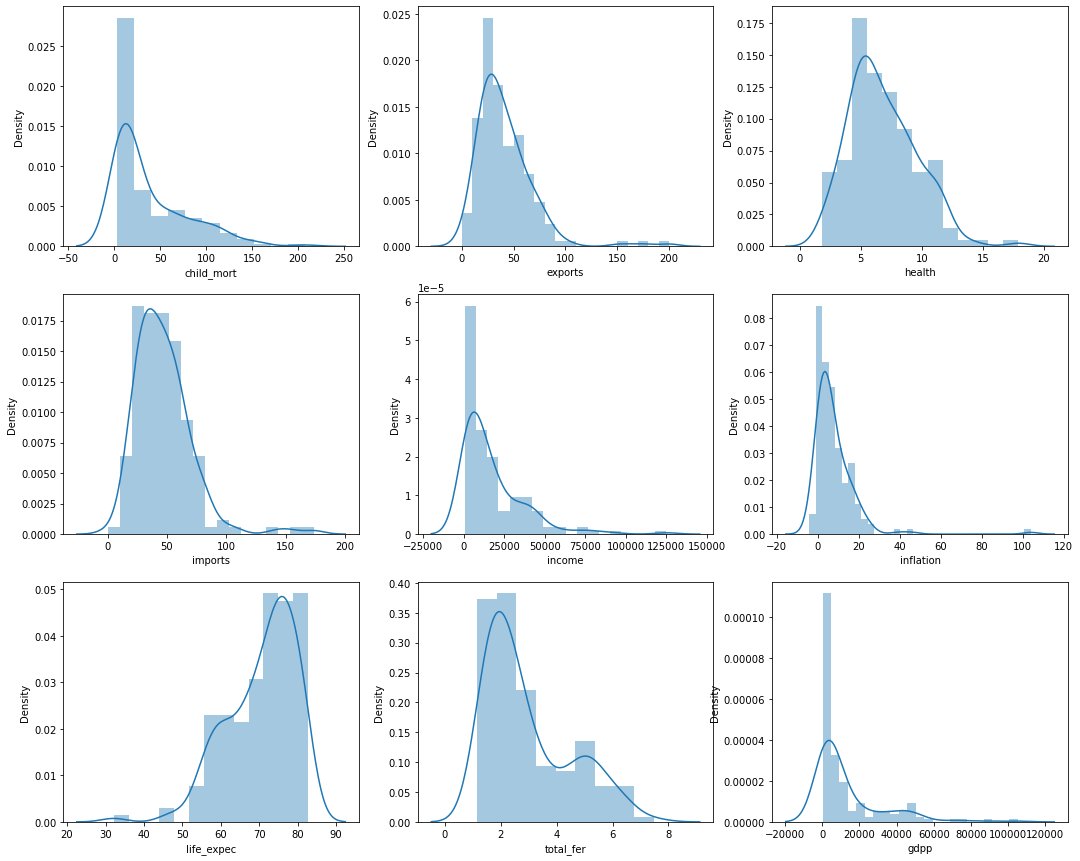

In [9]:
# Checking for distribution and skewness

num_cols = ['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']

plt.figure(figsize=[18,15])
for n,col in enumerate(num_cols):
    plt.subplot(3,3,n+1)
    sns.distplot(country[col])

### <font color = Green > Inference: </font>

As compared to the above statistical description we can verify that some countries are really in the need of funds to overcome their socio-economic challenges. Let's find out which countries are in need of that?

In [10]:
# bivariate analysis

In [11]:
country.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

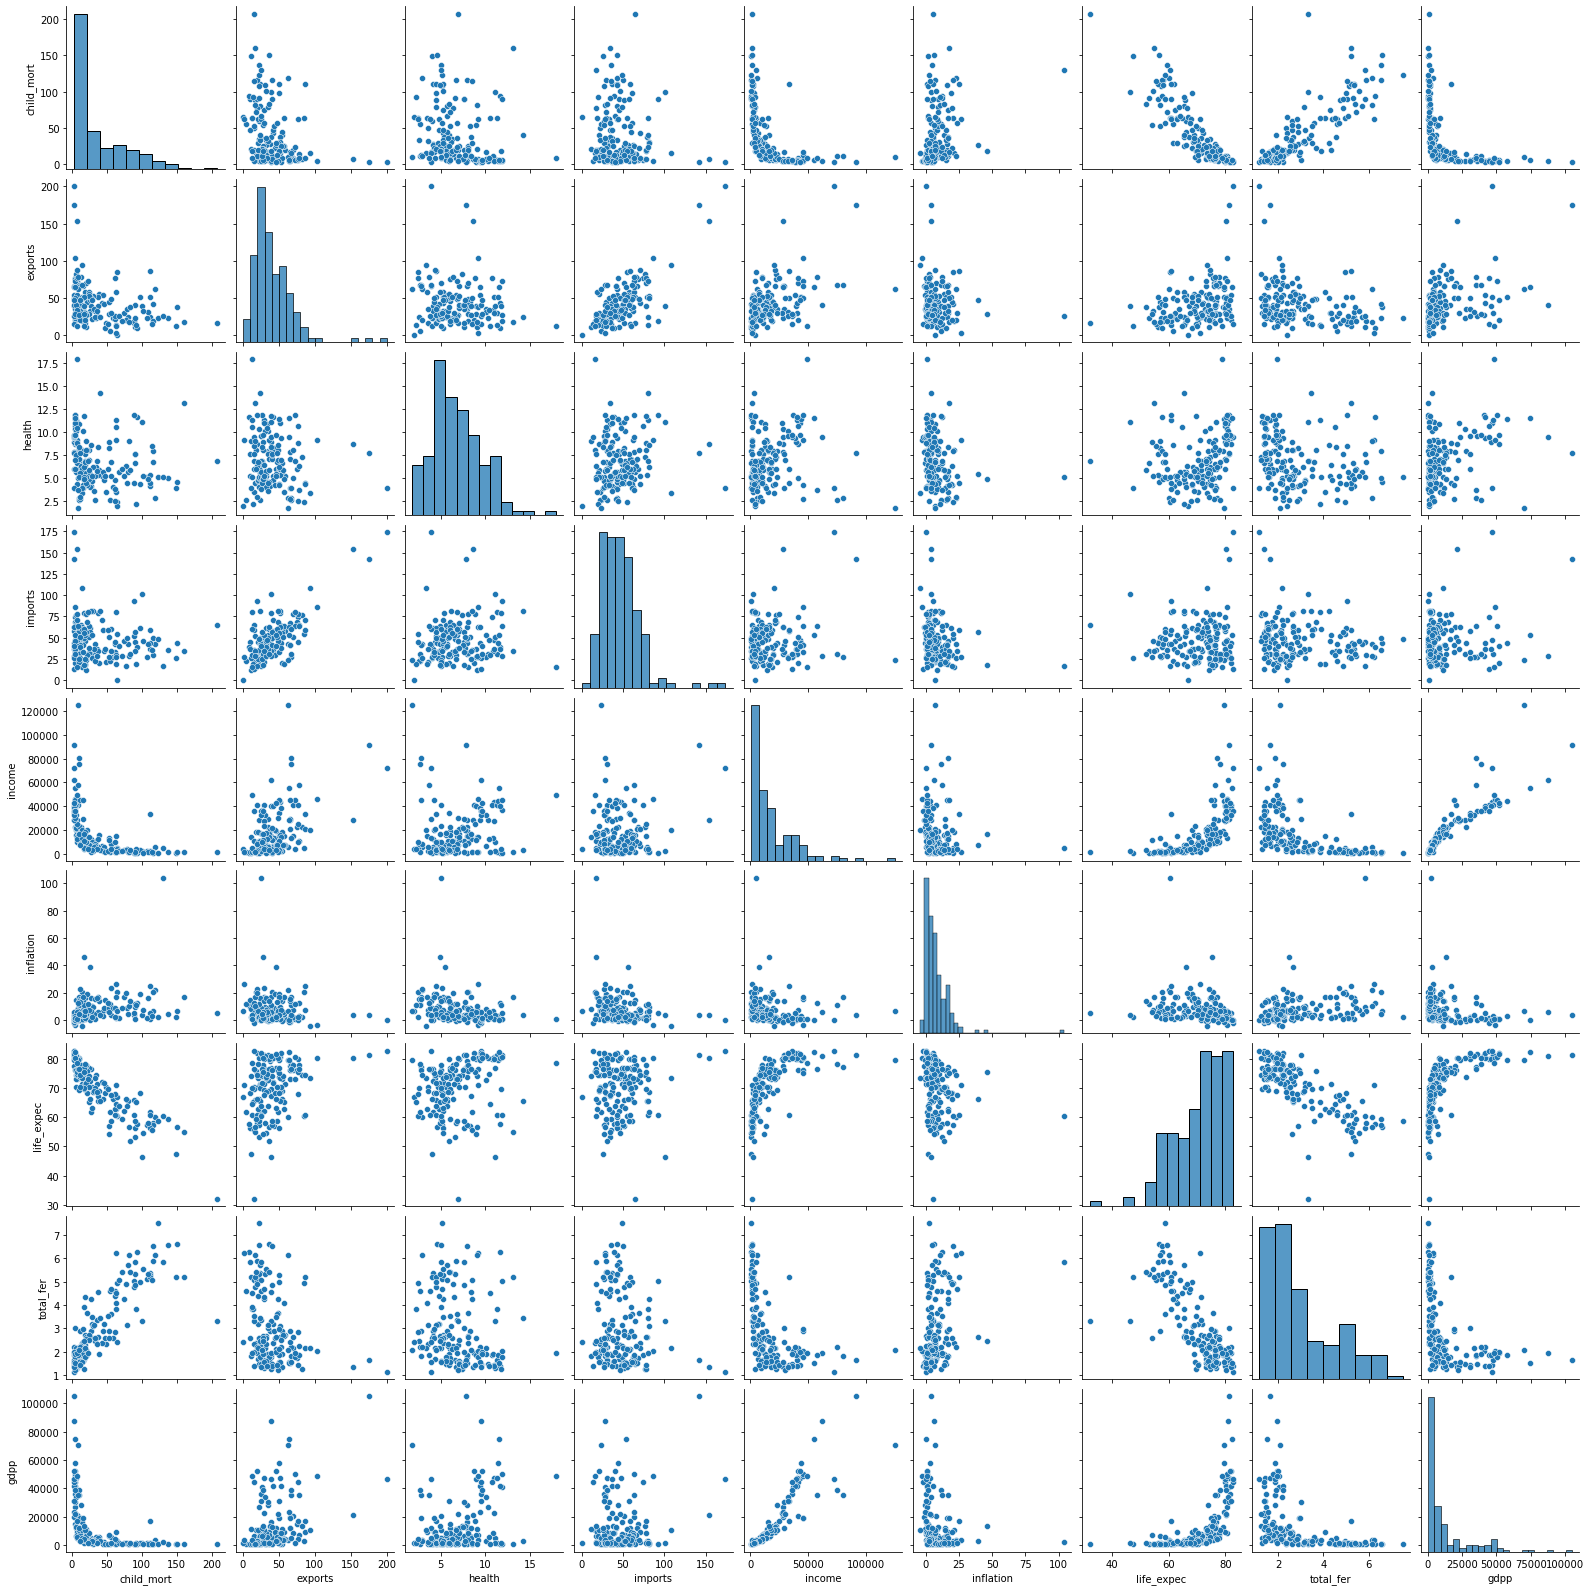

In [12]:
sns.pairplot(country)
plt.show()

### <font color = Green > Inference: </font>

+ As obvious GDP have a clear linear relationship with the income followed by exports and health. 
+ Most of countries having higher child mortality are the countries actually having low GDP. 
+ For our clustering model we will be focusing on gdp vs income and gdp vs child mortality rate. Let's visualize them more profoundly. 

In [13]:
import plotly
import plotly.express as px

In [14]:
fig = px.scatter(country, x='income', y='gdpp', trendline = 'ols', hover_name = 'country', 
                title = "GDP Vs Income Level", width = 1000, height = 700, size='gdpp')
fig.show()

### <font color = Green > Inference: </font>

+ Yes, we can verify that there is a linear realtionship between income and gdp. It clearly shows the countries having good income level have a high GPD growth and whereas countries having low income level have low GDP growth. 

In [15]:
fig = px.scatter(country, x='child_mort', y='gdpp', trendline = 'ols', hover_name = 'country',
                title = "GDP Vs Child Mortality Rate", width = 1000, height = 700,size='gdpp' )
fig.show()

### <font color = Green > Inference: </font>

+ As we can clearly verify the countries with low GDP has a high child mortality rate. 

## 3. Prepare the data for modelling


In [16]:
# checking for outliers

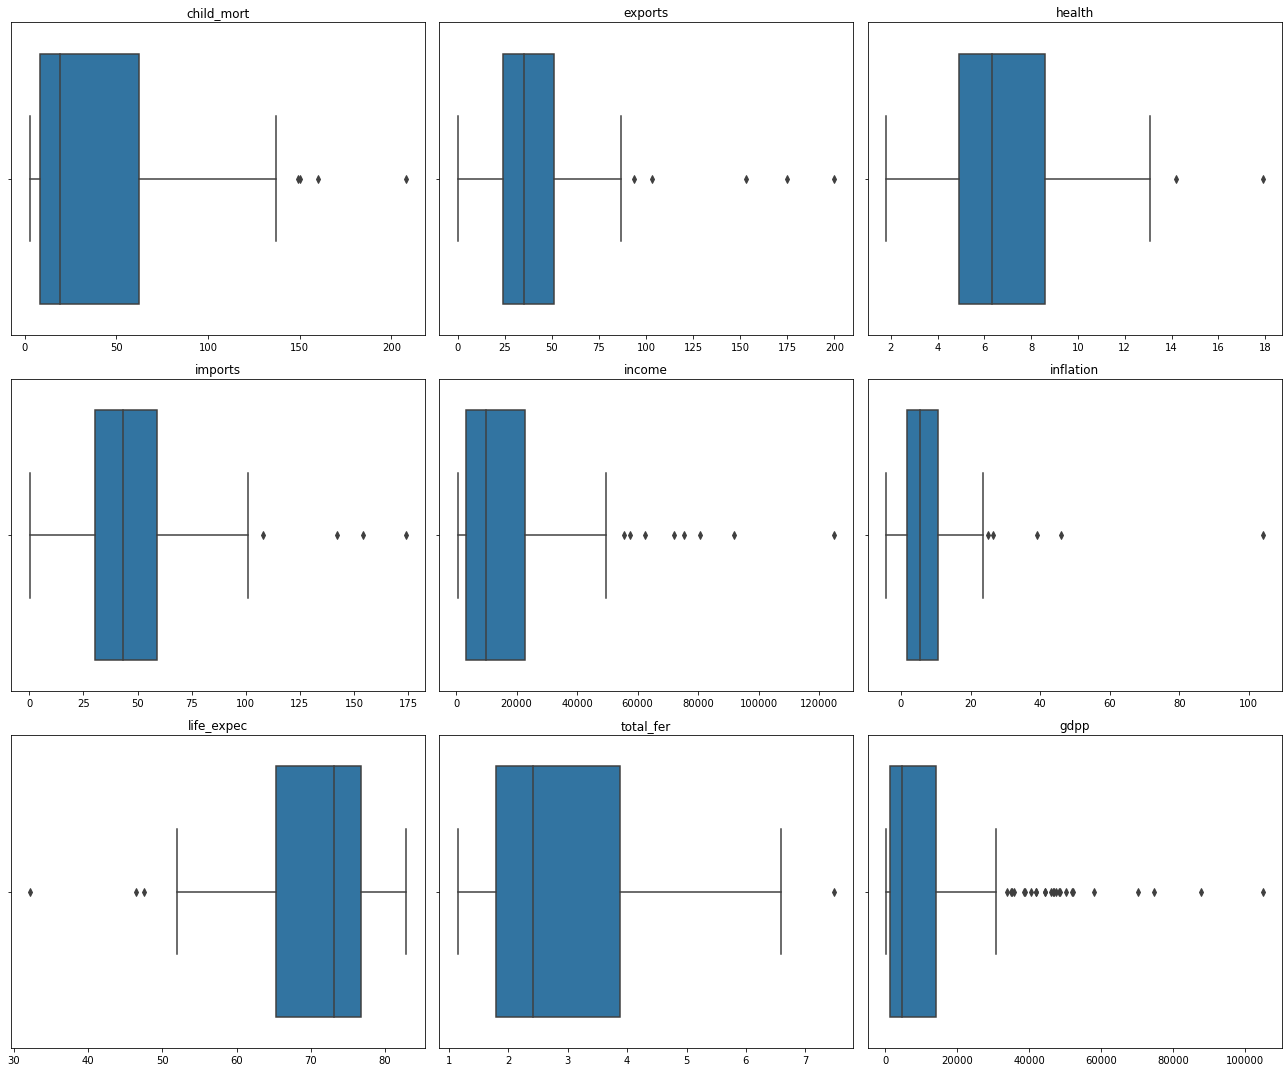

In [17]:
num_cols = ['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']
plt.figure(figsize=[18,15])

for n,col in enumerate(num_cols):
    plt.subplot(3,3,n+1)
    sns.boxplot(country[col], orient = "h")
    plt.xlabel("")
    plt.ylabel("")
    plt.title(col)
    plt.tight_layout()

### <font color = Green > Inference: </font>

+ Gdp and Income is witnessing a huge outliers range which could be the issue while creating the clusters. Hence, we will treat them by creating lower and upper bound buckets. 

In [18]:
grouped_country = country[['country','child_mort','income','gdpp']]
grouped_country.head()

country  child_mort  income   gdpp
0          Afghanistan        90.2    1610    553
1              Albania        16.6    9930   4090
2              Algeria        27.3   12900   4460
3               Angola       119.0    5900   3530
4  Antigua and Barbuda        10.3   19100  12200

In [19]:
grouped_country.shape

(167, 4)

In [20]:
# removing (statistical) outliers

# outlier treatment for gdp
Q1 = grouped_country.gdpp.quantile(0.25) 
Q3 = grouped_country.gdpp.quantile(0.75) 
IQR = Q3 - Q1  
grouped_country = grouped_country[(grouped_country.gdpp >= Q1 - 1.5*IQR) & (grouped_country.gdpp <= Q3 + 1.5*IQR)]

# outlier treatment for income
Q1 = grouped_country.income.quantile(0.25) 
Q3 = grouped_country.income.quantile(0.75) 
IQR = Q3 - Q1  
grouped_country = grouped_country[(grouped_country.income >= Q1 - 1.5*IQR) & (grouped_country.income <= Q3 + 1.5*IQR)]

# outlier treatment for child_mort
Q1 = grouped_country.child_mort.quantile(0.25) 
Q3 = grouped_country.child_mort.quantile(0.75) 
IQR = Q3 - Q1 
grouped_country = grouped_country[(grouped_country.child_mort >= Q1 - 1.5*IQR) & (grouped_country.child_mort <= Q3 + 1.5*IQR)]

grouped_country.shape

(135, 4)

In [21]:
grouped_country.describe()

child_mort        income          gdpp
count  135.000000    135.000000    135.000000
mean    41.192593  10485.370370   6212.666667
std     35.691327   8696.559108   6938.771477
min      3.200000    609.000000    231.000000
25%     14.000000   3005.000000   1300.000000
50%     26.100000   8000.000000   3600.000000
75%     63.150000  15950.000000   8265.000000
max    137.000000  33900.000000  30800.000000

In [22]:
# rescaling the attributes using StandaraScaler

import sklearn
from sklearn.preprocessing import StandardScaler

# subsetting the df to scaling variables
df = grouped_country[['child_mort', 'income', 'gdpp']]

# instantiate an object called scaler
scaler = StandardScaler()

# fit_transform
country_scaled = scaler.fit_transform(df)
country_scaled

array([[ 1.37820403e+00, -1.02436214e+00, -8.18696161e-01],
       [-6.91601780e-01, -6.40987762e-02, -3.07053251e-01],
       [-3.90692511e-01,  2.78687543e-01, -2.53531092e-01],
       [ 2.18812804e+00, -5.29226341e-01, -3.88059762e-01],
       [-8.68772657e-01,  9.94268413e-01,  8.66094614e-01],
       [-7.50658739e-01,  9.48101905e-01,  5.91251094e-01],
       [-6.49418237e-01, -4.36893326e-01, -4.32902652e-01],
       [-5.60364092e-02,  6.36477978e-01, -5.39079044e-02],
       [-7.70344392e-01,  1.43285024e+00,  3.15163546e+00],
       [ 2.30811678e-01, -9.28566633e-01, -7.89041992e-01],
       [-7.59095447e-01,  5.55686590e-01,  1.41578165e+00],
       [-1.00375999e+00,  6.59561232e-01, -2.64235524e-02],
       [-6.29732584e-01, -3.00702128e-01, -2.70889630e-01],
       [ 1.96314915e+00, -1.00012472e+00, -7.89041992e-01],
       [ 4.23918561e-02, -4.69209881e-01, -5.83343316e-01],
       [ 1.52069066e-01, -5.85780313e-01, -6.12274213e-01],
       [-9.64388686e-01, -8.83361927e-02

In [23]:
country_scaled.shape

(135, 3)

In [24]:
# converting it into a dataframe as it is in the Numpy array form

country_scaled = pd.DataFrame(country_scaled)
country_scaled.columns = ['child_mort', 'income', 'gdpp']
country_scaled.head()

child_mort    income      gdpp
0    1.378204 -1.024362 -0.818696
1   -0.691602 -0.064099 -0.307053
2   -0.390693  0.278688 -0.253531
3    2.188128 -0.529226 -0.388060
4   -0.868773  0.994268  0.866095

## Hopkins Statistics:
The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

- If the value is between {0.01, ...,0.3}, the data is regularly spaced.

- If the value is around 0.5, it is random.

- If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [25]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [26]:
#Use the Hopkins Statistic function by passing the above dataframe as a paramter
hopkins(country_scaled)

0.8256945693539015

### <font color = Green > Inference: </font>
 
+ As seen our data has a high tendency to cluster

## 4. K-means Modelling

In [27]:
from sklearn.cluster import KMeans 

In [28]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=4, max_iter=50, random_state=100)
kmeans.fit(country_scaled)

KMeans(max_iter=50, n_clusters=4, random_state=100)

In [29]:
kmeans.labels_

array([3, 1, 1, 3, 2, 2, 1, 2, 0, 1, 2, 2, 1, 3, 1, 1, 1, 1, 2, 2, 3, 3,
       1, 3, 1, 2, 1, 1, 3, 3, 3, 2, 3, 2, 0, 0, 1, 1, 1, 1, 0, 3, 2, 1,
       2, 3, 1, 3, 0, 1, 1, 3, 3, 1, 2, 3, 1, 2, 1, 0, 1, 1, 2, 3, 3, 1,
       3, 2, 2, 3, 3, 2, 2, 1, 3, 3, 2, 1, 3, 0, 3, 2, 1, 1, 1, 2, 1, 3,
       3, 1, 1, 3, 3, 3, 2, 1, 1, 1, 2, 0, 2, 2, 3, 1, 3, 1, 2, 2, 0, 1,
       1, 0, 0, 1, 1, 3, 2, 1, 3, 1, 3, 3, 1, 1, 2, 1, 3, 1, 2, 1, 1, 2,
       1, 1, 3])

In [30]:
len(kmeans.labels_)

135

## Finding the Optimal Number of Clusters
Now you might be thinking why the number of clusters is taken as 4 and not any other number. To find the optimum number of clusters, we use two techniques - the elbow curve method and the silhouette score method. Let's learn about both of them in detail

### SSD - Sum of Squared Distances

In [31]:
# elbow curve
ssd = []

range_n_clusters = [2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50, random_state=100)
    kmeans.fit(country_scaled)
    
    ssd.append(kmeans.inertia_)
    
ssd

[187.25369296814108,
 99.82541757234519,
 63.60755110327689,
 49.115737622442296,
 39.32875732229454,
 30.787630318487686,
 26.047271970437293]

In [32]:
# for 2 clusters we have the ssd of 187.25
# for 3 clusters we have the ssd of 99.82 and so on

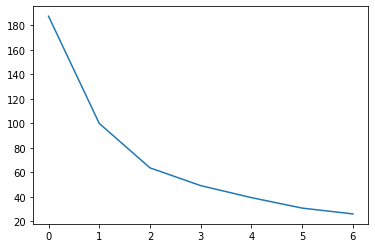

In [33]:
# Also let's plot it
plt.plot(ssd)

### <font color = Green > Inference: </font>

+ On the X-axis clusters are represented by the index of that list created in ssd which is correlated to clusters i.e  0 represents 2 clusters, 1 represents 3 clusters and so on. 
+ We can see after a point the ssd decreases gradually starting at highest in 2 clusters. 
+ For if you look between 3 and 4 i.e 5 and 6 clusters, if you add any more cluster does not decrease the value of ssd significantly hence it seems to be a bad idea of adding more than 5 clusters. 
+ SSD is nothing by sum of squared distances of indvidual samples to their closet cluster center.
+ Imaging this starting by having only 1 cluster and then computing the distance from all data points till the centroid of that 1 cluster. There will a lot of data points very far off the centroid of that one cluster and hence the number will be huge. Then adding on one more cluster will reduce the ssd and eventually adding more cluster will do the same. therefore, ssd decreases when the number of clusters increases. At the extream case where we can have the number of clusters as equal to all data points, we will have 0 ssd. 

But to find the optimal number of clusters, ask this questions: Does the value of ssd go down enough, compare to the previous number of clusters so that adding another cluster is justified? 

### Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of, bigger the p, better.    

$q$ is the mean intra-cluster distance to all the points in its own cluster, smaller the q, better. 

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the same cluster and dis-similar to the data points in the neighbor cluster, (Good cluster) 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster. (Bad cluster)

conditions: 
+ p and q is defined for each datapoint. 
+ inter-cluster distance between two clusters must be high.
+ intra-cluster distance between two points within a cluster must be low. 

In [34]:
from sklearn.metrics import silhouette_score

range_n_clusters = [2,3,4,5,6,7,8]

for num_clusters in range_n_clusters:
    
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50, random_state=100)
    kmeans.fit(country_scaled)
    
    cluster_labels = kmeans.labels_
    
    silhouette_avg = silhouette_score(country_scaled, cluster_labels)
    print("For n_clusters = {0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters = 2, the silhouette score is 0.49430904564101164
For n_clusters = 3, the silhouette score is 0.4885430637033936
For n_clusters = 4, the silhouette score is 0.4903937866688306
For n_clusters = 5, the silhouette score is 0.44701506997082047
For n_clusters = 6, the silhouette score is 0.456863811429393
For n_clusters = 7, the silhouette score is 0.42351224205201243
For n_clusters = 8, the silhouette score is 0.4446160252826439


### <font color = Green > Inference: </font>

+ looking at both the metrics, we will go ahead with our arbitrary value for clusters i.e k = 3. 

In [35]:
# final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50, random_state=100)
kmeans.fit(country_scaled)

KMeans(max_iter=50, n_clusters=3, random_state=100)

In [36]:
kmeans.labels_

array([0, 1, 1, 0, 2, 2, 1, 1, 2, 0, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 2, 1, 1, 0, 0, 0, 1, 0, 2, 2, 2, 1, 1, 1, 1, 2, 0, 2, 1,
       1, 0, 1, 0, 2, 1, 1, 0, 0, 1, 2, 0, 1, 1, 1, 2, 1, 1, 2, 0, 0, 1,
       0, 2, 1, 0, 0, 2, 2, 1, 0, 0, 2, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 1, 2, 0, 1, 0, 1, 2, 2, 2, 1,
       1, 2, 2, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 2, 1, 0, 1, 2, 1, 1, 2,
       1, 0, 0])

In [37]:
# assign the label 0, 1 and 2 to original dataframe having customerid
grouped_country['cluster_id'] = kmeans.labels_
grouped_country

country  child_mort  income   gdpp  cluster_id
0            Afghanistan        90.2    1610    553           0
1                Albania        16.6    9930   4090           1
2                Algeria        27.3   12900   4460           1
3                 Angola       119.0    5900   3530           0
4    Antigua and Barbuda        10.3   19100  12200           2
..                   ...         ...     ...    ...         ...
162              Vanuatu        29.2    2950   2970           1
163            Venezuela        17.1   16500  13500           2
164              Vietnam        23.3    4490   1310           1
165                Yemen        56.3    4480   1310           0
166               Zambia        83.1    3280   1460           0

[135 rows x 5 columns]

In [38]:
# Visualising all 5 clusters: 
fig = px.scatter(grouped_country, x='child_mort', y='gdpp', trendline = 'ols', hover_name = 'country', color='cluster_id',
                title = "GDP Vs Child Mortality Rate", width = 1000, height = 700, size='gdpp')
fig.show()

### <font color = Green > Inference: </font>

+ Cluster 0: Lower GPD - Higher Child Mortality Rate
+ Cluster 1: Lower GDP - Lower Child Mortality Rate
+ Cluster 2: Higher GDP - Lower Child Mortality Rate

In [39]:
# Visualising all 4 clusters: 
fig = px.scatter(grouped_country, x='income', y='gdpp', trendline = 'ols', hover_name = 'country', color='cluster_id',
                title = "GDP Vs Income Mortality Rate", width = 1000, height = 700, size='gdpp')
fig.show()

### <font color = Green > Inference: </font>

+ Cluster 0: Lower Income Level - Low GDP
+ Cluster 1: Medium Income Level - Medium GDP
+ Cluster 2: Higher Income Level - High GDP

<AxesSubplot:xlabel='cluster_id', ylabel='child_mort'>

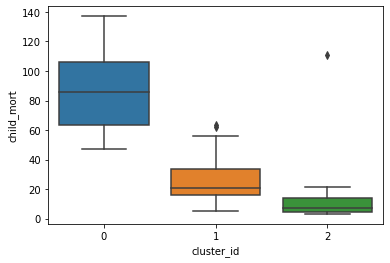

In [40]:
# plot: Comparing the distrinution of batting averages across all clusters. 
sns.boxplot(x='cluster_id', y='child_mort', data=grouped_country)


### <font color = Green > Inference: </font>

+ Cluster 0 have highe Child Mortality Rate which obviously means they also have low GDP.  

<AxesSubplot:xlabel='cluster_id', ylabel='income'>

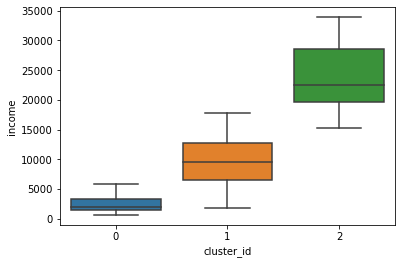

In [41]:
# plot: Comparing the distrinution of batting averages across all clusters. 
sns.boxplot(x='cluster_id', y='income', data=grouped_country)

<AxesSubplot:xlabel='cluster_id', ylabel='gdpp'>

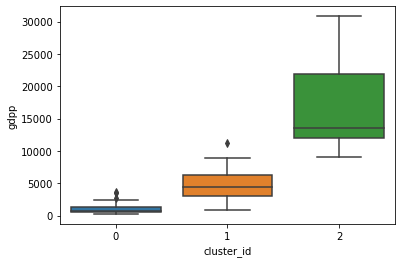

In [42]:
# plot: Comparing the distrinution of batting averages across all clusters. 
sns.boxplot(x='cluster_id', y='gdpp', data=grouped_country)

### <font color = Green > Inference: </font>

+ Similarly, countries in Cluster 0 belong to lower Income group and low GDP. Let's see which countries are there in Cluster 0.

In [43]:
# identifying countries belonging to lower Income group and with low GDP while having higher Child Mortality rate 
grouped_country[grouped_country['cluster_id'] == 0] 

country  child_mort  income  gdpp  cluster_id
0         Afghanistan        90.2    1610   553           0
3              Angola       119.0    5900  3530           0
12         Bangladesh        49.4    2440   758           0
17              Benin       111.0    1820   758           0
25       Burkina Faso       116.0    1430   575           0
26            Burundi        93.6     764   231           0
28           Cameroon       108.0    2660  1310           0
36            Comoros        88.2    1410   769           0
37   Congo, Dem. Rep.       116.0     609   334           0
38        Congo, Rep.        63.9    5190  2740           0
40      Cote d'Ivoire       111.0    2690  1220           0
50            Eritrea        55.2    1420   482           0
56             Gambia        80.3    1660   562           0
59              Ghana        74.7    3060  1310           0
63             Guinea       109.0    1190   648           0
64      Guinea-Bissau       114.0    1390   547           0
69              India        58.8    4410  1350           0
80              Kenya        62.2    2480   967           0
81           Kiribati        62.7    1730  1490           0
84                Lao        78.9    3980  1140           0
87            Lesotho        99.7    2380  1170           0
88            Liberia        89.3     700   327           0
93         Madagascar        62.2    1390   413           0
94             Malawi        90.5    1030   459           0
97               Mali       137.0    1870   708           0
99         Mauritania        97.4    3320  1200           0
106        Mozambique       101.0     918   419           0
107           Myanmar        64.4    3720   988           0
109             Nepal        47.0    1990   592           0
112             Niger       123.0     814   348           0
113           Nigeria       130.0    5150  2330           0
116          Pakistan        92.1    4280  1040           0
126            Rwanda        63.6    1350   563           0
129           Senegal        66.8    2180  1000           0
142             Sudan        76.7    3370  1480           0
146        Tajikistan        52.4    2110   738           0
147          Tanzania        71.9    2090   702           0
149       Timor-Leste        62.6    1850  3600           0
150              Togo        90.3    1210   488           0
155            Uganda        81.0    1540   595           0
165             Yemen        56.3    4480  1310           0
166            Zambia        83.1    3280  1460           0

## 5. Hierarchical Clustering


In [44]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [45]:
# We have two dataframes

country_scaled.head()

child_mort    income      gdpp
0    1.378204 -1.024362 -0.818696
1   -0.691602 -0.064099 -0.307053
2   -0.390693  0.278688 -0.253531
3    2.188128 -0.529226 -0.388060
4   -0.868773  0.994268  0.866095

In [46]:
grouped_country.head()

country  child_mort  income   gdpp  cluster_id
0          Afghanistan        90.2    1610    553           0
1              Albania        16.6    9930   4090           1
2              Algeria        27.3   12900   4460           1
3               Angola       119.0    5900   3530           0
4  Antigua and Barbuda        10.3   19100  12200           2

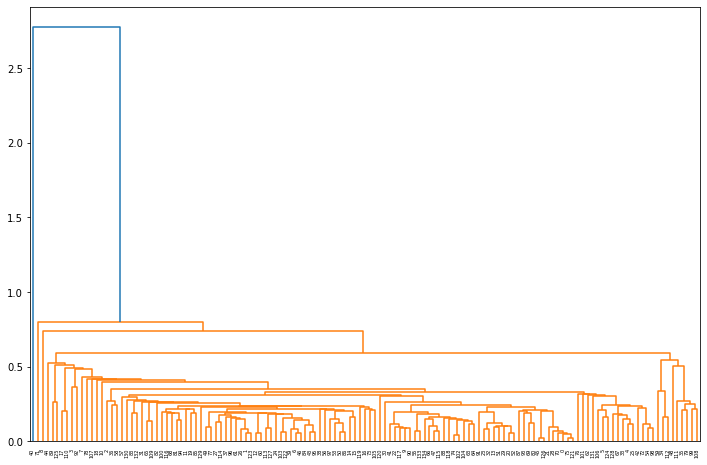

In [47]:
# single linkage
plt.figure(figsize = [12,8])
mergings = linkage(country_scaled, method = 'single', metric = 'euclidean')
dendrogram(mergings)
plt.show()

### <font color = Green > Inference: </font>

+ Not much can be interpretable through Single Linkage. Hence, let's go ahead and compute complete linkage

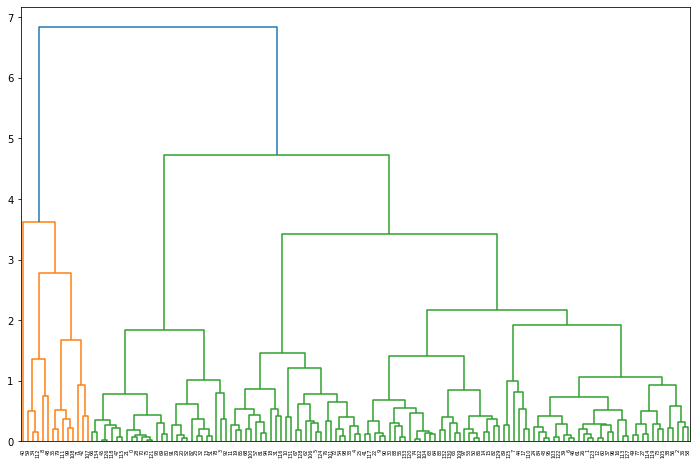

In [48]:
# complete linkage
plt.figure(figsize = [12,8])
mergings = linkage(country_scaled, method = 'complete', metric = 'euclidean')
dendrogram(mergings)
plt.show()

### <font color = Green > Inference: </font>

+ Y-axis represents the height of the dendrogram. More the height, more the variance/difference in the clusters. 
+ If you draw a horizontal line at 10, you will get 2 clusters. If you draw a horizontal line at 8, you will get 3 clusters. Similarly you need to find the optimal threshold to find where to cut the tree. It also depends on the business object. 
+ Here is our case, we will keep the k = 3, as we already know by executing k-means that 3 clusters are optimal. 

In [49]:
# 3 clusters
cut_tree(mergings, n_clusters=3).shape

(135, 1)

In [50]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 0, 1, 0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 2, 1, 1, 1, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 2, 2, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0])

In [51]:
# assign cluster labels
grouped_country['cluster_labels'] = cluster_labels
grouped_country.head()

country  child_mort  income   gdpp  cluster_id  cluster_labels
0          Afghanistan        90.2    1610    553           0               0
1              Albania        16.6    9930   4090           1               1
2              Algeria        27.3   12900   4460           1               1
3               Angola       119.0    5900   3530           0               0
4  Antigua and Barbuda        10.3   19100  12200           2               1

In [52]:
# Visualising all 4 clusters: 
fig = px.scatter(grouped_country, x='child_mort', y='gdpp', trendline = 'ols', hover_name = 'country', color='cluster_labels',
                title = "GDP Vs Child Mortality Rate", width = 1000, height = 700, size='gdpp')
fig.show()

### <font color = Green > Inference: </font>

+ Cluster 0: Lower GPD - Higher Child Mortality Rate
+ Cluster 1: Lower GDP - Lower Child Mortality Rate
+ Cluster 2: Higher GDP - Lower Child Mortality Rate

In [53]:
# Visualising all 4 clusters: 
fig = px.scatter(grouped_country, x='income', y='gdpp', trendline = 'ols', hover_name = 'country', color='cluster_labels',
                title = "GDP Vs Income Level", width = 1000, height = 700, size='gdpp')
fig.show()

### <font color = Green > Inference: </font>

+ Cluster 0: Lower Income Level - Low GDP
+ Cluster 1: Medium Income Level - Medium GDP
+ Cluster 2: Higher Income Level - High GDP

<AxesSubplot:xlabel='cluster_labels', ylabel='child_mort'>

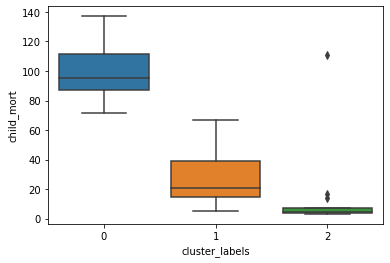

In [54]:
# plot: Comparing the distrinution of batting averages across all clusters. 
sns.boxplot(x='cluster_labels', y='child_mort', data=grouped_country)

### <font color = Green > Inference: </font>

+ Similarly as we have witness in K-Means, Countries in Cluster 0 have a high Child Mortality Rate


<AxesSubplot:xlabel='cluster_labels', ylabel='income'>

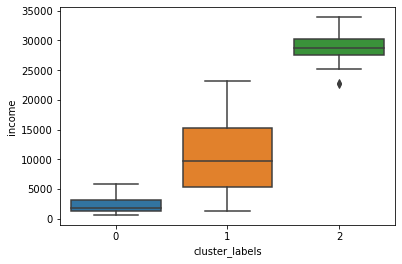

In [55]:
# plot: Comparing the distrinution of batting averages across all clusters. 
sns.boxplot(x='cluster_labels', y='income', data=grouped_country)

<AxesSubplot:xlabel='cluster_labels', ylabel='gdpp'>

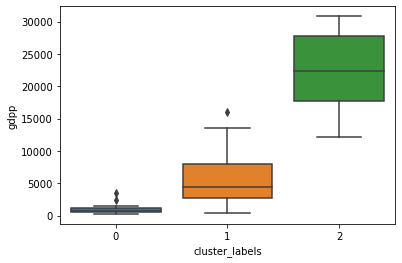

In [56]:
# plot: Comparing the distrinution of batting averages across all clusters. 
sns.boxplot(x='cluster_labels', y='gdpp', data=grouped_country)

### <font color = Green > Inference: </font>

+ Also, as similarly as witnessed in K-means, countries in Cluster 0 have belong to Lower Income Group and Low GDP. Let's see which countries are those?


In [57]:
# identifying countries belonging to lower Income group and with low GDP while having higher Child Mortality rate 
grouped_country[grouped_country['cluster_labels'] == 0] 

country  child_mort  income  gdpp  cluster_id  cluster_labels
0         Afghanistan        90.2    1610   553           0               0
3              Angola       119.0    5900  3530           0               0
17              Benin       111.0    1820   758           0               0
25       Burkina Faso       116.0    1430   575           0               0
26            Burundi        93.6     764   231           0               0
28           Cameroon       108.0    2660  1310           0               0
36            Comoros        88.2    1410   769           0               0
37   Congo, Dem. Rep.       116.0     609   334           0               0
40      Cote d'Ivoire       111.0    2690  1220           0               0
56             Gambia        80.3    1660   562           0               0
59              Ghana        74.7    3060  1310           0               0
63             Guinea       109.0    1190   648           0               0
64      Guinea-Bissau       114.0    1390   547           0               0
84                Lao        78.9    3980  1140           0               0
87            Lesotho        99.7    2380  1170           0               0
88            Liberia        89.3     700   327           0               0
94             Malawi        90.5    1030   459           0               0
97               Mali       137.0    1870   708           0               0
99         Mauritania        97.4    3320  1200           0               0
106        Mozambique       101.0     918   419           0               0
112             Niger       123.0     814   348           0               0
113           Nigeria       130.0    5150  2330           0               0
116          Pakistan        92.1    4280  1040           0               0
142             Sudan        76.7    3370  1480           0               0
147          Tanzania        71.9    2090   702           0               0
150              Togo        90.3    1210   488           0               0
155            Uganda        81.0    1540   595           0               0
166            Zambia        83.1    3280  1460           0               0

### <font color = Green > Inference: </font>

+ As we can witness one thing here is that the lables of cluster_id from K-Means and cluster_labels from Hierarchical clustering are all same which is 0, that means almost all the countries that has been considere in cluster 0 under k-means has also been considered in cluster 0 under Hierarchical. 
+ Hence, we can take any clustering method to identify the countries from cluster 0 to provide the funded aid. 

## 6. Final analysis & business recommendation

+ As per our final objective to report at least 5 countries which are in direct need of aid from our analysis work are (Let's pick 5 countries from each clusters, with higher child mortality rate and lower income group + GDP from the above list): 

**5 Countries having High Child Mortality Rate:** 
- Mali
- Nigeria
- Angola
- Niger
- Guinea-Bissau

**5 Countries belonging to lower Income Group and Low GDP:** 
- Congo, Dem. Rep.
- Burundi
- Liberia
- Niger
- Mozambique